# 1. Data Preparation for Gradient Boosting

As XGBoost models represent all problems as a regression predictive modeling problem that only takes numerical values as input. Therefore, we need to convert data into the expected format

## 1.1 Label Encodes String Class Values

Here, we used the iris dataset as sample data

We can easily convert the string values to integer values using the ***LabelEncoder***

In [ ]:
# Load packages
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load data
data = pd.read_csv('iris.csv', header=None)
dataset = data.values

# Split data into X and y 
X = dataset[:,0:4]
y = dataset[:,4]

In [ ]:
# Encode String calss values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)

In [ ]:
# Fit the model
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=0.3, random_state=666)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(objective='multi:softprob')


In [ ]:
# Predict
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# Evaluate
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9777777777777777


## 1.2 One Hot Encode Categorical Data

One-Hot encoder used on the label encoded variable

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load the data
data = pd.read_csv('breast-cancer.csv', header=None)
dataset = data.values

# Split data into X and y
X = dataset[:, 0:9]
X = X.astype(str)
Y = dataset[:, 9]

In [ ]:
# Encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
  label_encoder = LabelEncoder()
  feature = label_encoder.fit_transform(X[:,i])
  feature = feature.reshape(X.shape[0], 1)
  onehot_encoder = OneHotEncoder(sparse=False, categories="auto")
  feature = onehot_encoder.fit_transform(feature)

  if encoded_x is None:
    encoded_x = feature
  else:
    encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: ", encoded_x.shape)

X shape:  (286, 43)


In [ ]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)


In [ ]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=0.33, random_state=1)
# fit the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier()
Accuracy: 71.58%


## 1.3 Support for Missing Data

XGBoost can automatically learn how to best handle missing data. 

Missing data is handled the same way that sparse or zero values are handled, by minimizing the loss function

In [ ]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load data
dataframe = read_csv("horse-colic.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split data into X and y
X = dataset[:,0:27]
Y = dataset[:,27]
# set missing values to 0
X[X == '?'] = 0
# convert to numeric
X = X.astype('float32')
# encode Y class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier()
Accuracy: 83.84%


Use ***SimpleImputer*** handle missing data, default is mean

In [ ]:

# binary classification, missing data, impute with mean
import numpy
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# load data
dataframe = read_csv("horse-colic.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split data into X and y
X = dataset[:,0:27]
Y = dataset[:,27]
# set missing values to 0
X[X == '?'] = numpy.nan
# convert to numeric
X = X.astype('float32')
# impute missing values as the mean
imputer = SimpleImputer()
imputed_x = imputer.fit_transform(X)
# encode Y class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(imputed_x, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier()
Accuracy: 79.80%


---

# 2. XGBoost Basics

In [ ]:
import xgboost
print(xgboost.__version__)

## 2.1 XGBoost Ensemble for Classification

In [ ]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# make predictions using xgboost for classification
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

## 2.2 XGBoost Ensemble for Regression

In [ ]:
# evaluate xgboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# gradient xgboost for making predictions for regression
from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
row = asarray([row])
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

---

# 3. Hyperparameter

## 3.1 Explore Number of Trees

>10 0.829 (0.037)
>50 0.871 (0.027)
>100 0.899 (0.029)
>500 0.927 (0.025)
>1000 0.927 (0.025)
>5000 0.927 (0.026)


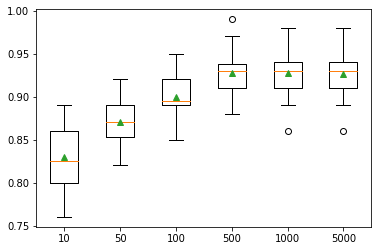

In [1]:
# explore xgboost number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000, 5000]
	for n in trees:
		models[str(n)] = XGBClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## 3.2 Explore Tree Depth

>1 0.833 (0.029)
>2 0.874 (0.031)
>3 0.899 (0.029)
>4 0.916 (0.030)
>5 0.922 (0.030)
>6 0.923 (0.030)
>7 0.920 (0.026)
>8 0.916 (0.032)
>9 0.919 (0.028)
>10 0.918 (0.029)


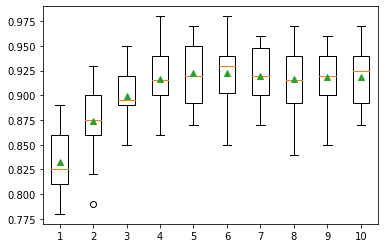

In [2]:
# explore xgboost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = XGBClassifier(max_depth=i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## 3.3 Explore Learning Rate

>0.0001 0.899 (0.029)
>0.0010 0.899 (0.029)
>0.0100 0.899 (0.029)
>0.1000 0.899 (0.029)
>1.0000 0.899 (0.029)


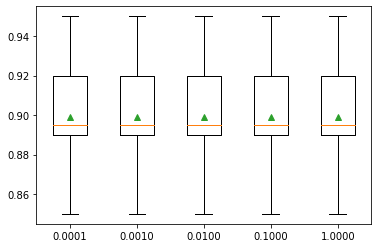

In [3]:
# explore xgboost learning rate effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = XGBClassifier(eta=r)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## 3.4 Explore Number of Samples

>0.1 0.882 (0.034)
>0.2 0.903 (0.028)
>0.3 0.909 (0.030)
>0.4 0.913 (0.031)
>0.5 0.914 (0.026)
>0.6 0.908 (0.029)
>0.7 0.910 (0.025)
>0.8 0.911 (0.029)
>0.9 0.906 (0.028)
>1.0 0.899 (0.029)


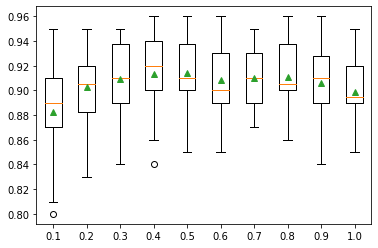

In [4]:
# explore xgboost subsample ratio effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(subsample=i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## 3.5 Explore Number of Features

>0.1 0.845 (0.038)
>0.2 0.883 (0.031)
>0.3 0.893 (0.032)
>0.4 0.901 (0.033)
>0.5 0.900 (0.033)
>0.6 0.903 (0.026)
>0.7 0.902 (0.028)
>0.8 0.902 (0.026)
>0.9 0.898 (0.028)
>1.0 0.899 (0.029)


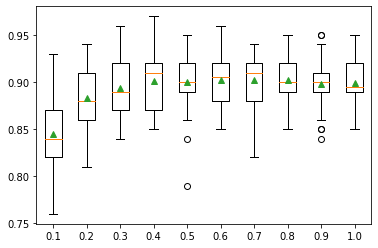

In [5]:
# explore xgboost column ratio per tree effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(colsample_bytree=i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## 3.6 Grid Search

---

# 4. Random Forest with XGBoost

## 4.1 XGBoost Random Forest for Classification

In [6]:
# evaluate xgboost random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.835 (0.034)


In [7]:
# make predictions using xgboost random forest for classification
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBRFClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# fit the model on the whole dataset
model.fit(X, y)
# define a row of data
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
# make a prediction
yhat = model.predict(row)
# summarize the prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


## 4.2 XGBoost Random Forest for Regression

In [8]:
# evaluate xgboost random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -136.517 (7.248)


In [9]:
# gradient xgboost random forest for making predictions for regression
from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRFRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of data
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
row = asarray([row])
# make a prediction
yhat = model.predict(row)
# summarize the prediction
print('Prediction: %d' % yhat[0])

[15:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Prediction: 14


---

# 5. Feature Importance and Feature Selection

## 5.1 Using the Built-in XGBoost Feature Importance Plot

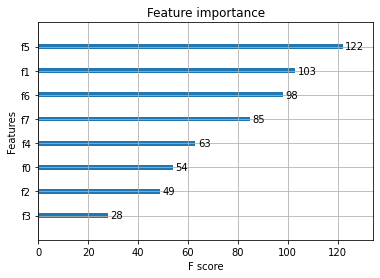

In [11]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

## 5.2 Feature Selection with XGBoost Feature Importance Scores


This is done using the SelectFromModel class that takes a model and can transform a dataset into a subset with selected features.

In [12]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 77.95%
Thresh=0.078, n=8, Accuracy: 77.95%
Thresh=0.080, n=7, Accuracy: 76.38%
Thresh=0.085, n=6, Accuracy: 77.56%
Thresh=0.095, n=5, Accuracy: 76.38%
Thresh=0.102, n=4, Accuracy: 76.38%
Thresh=0.109, n=3, Accuracy: 74.80%
Thresh=0.160, n=2, Accuracy: 75.98%
Thresh=0.292, n=1, Accuracy: 70.08%


---

# 6. Project Overview

## 6.1 Create useful functions and load library

In [13]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [14]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

---

## 6.2 Modeling

### 6.2.1 XGBoost in Regression

In [16]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))

[15:58:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
36.271203581682585


### 6.2.2 Binary classification

In [17]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[212   0]
 [  0 357]]


### 6.2.3 Multiclass classification

In [18]:
wine = load_wine()

X = wine.data
y = wine.target

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


## 6.3 Cross Validation

In [19]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

Scores: [55.30444573 55.59151472 63.44642064 57.82986083 58.71808276]
Mean: 58.178
Std: 2.937


In [20]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

scores = cross_val_score(xgb_model, X, y, scoring="neg_mean_squared_error", cv=5)

display_scores(np.sqrt(-scores))

Scores: [56.04057166 56.14039793 60.3213523  59.67532995 60.7722925 ]
Mean: 58.590
Std: 2.071


## 6.4 Grid Search

In [21]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 0.472 (std: 0.005)
Parameters: {'colsample_bytree': 0.753103145283024, 'gamma': 0.044351266878527806, 'learning_rate': 0.06619076133018023, 'max_depth': 2, 'n_estimators': 111, 'subsample': 0.682533487362317}



## 6.4 Early Stopping

Stop when 5 rounds not improved to avoid uncapped boosted trees

In [22]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

# if more than one evaluation metric are given the last one is used for early stopping
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred)

[0]	validation_0-auc:0.964315
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.970662
[2]	validation_0-auc:0.976176
[3]	validation_0-auc:0.976176
[4]	validation_0-auc:0.977216
[5]	validation_0-auc:0.977008
[6]	validation_0-auc:0.97732
[7]	validation_0-auc:0.97732
[8]	validation_0-auc:0.973575
[9]	validation_0-auc:0.973575
[10]	validation_0-auc:0.973575
[11]	validation_0-auc:0.973575
Stopping. Best iteration:
[6]	validation_0-auc:0.97732



0.958041958041958

In [23]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.97732, best iteration: 6, best ntree limit 7


## 6.5 Evaluation

In [24]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

[0]	validation_0-auc:0.964315	validation_0-error:0.048951	validation_0-error@0.6:0.622378
[1]	validation_0-auc:0.970662	validation_0-error:0.048951	validation_0-error@0.6:0.622378
[2]	validation_0-auc:0.976176	validation_0-error:0.041958	validation_0-error@0.6:0.104895
[3]	validation_0-auc:0.976176	validation_0-error:0.041958	validation_0-error@0.6:0.076923
[4]	validation_0-auc:0.977216	validation_0-error:0.041958	validation_0-error@0.6:0.062937
[5]	validation_0-auc:0.977008	validation_0-error:0.041958	validation_0-error@0.6:0.062937
[6]	validation_0-auc:0.97732	validation_0-error:0.041958	validation_0-error@0.6:0.055944
[7]	validation_0-auc:0.97732	validation_0-error:0.048951	validation_0-error@0.6:0.048951
[8]	validation_0-auc:0.973575	validation_0-error:0.048951	validation_0-error@0.6:0.048951
[9]	validation_0-auc:0.973575	validation_0-error:0.048951	validation_0-error@0.6:0.048951
[10]	validation_0-auc:0.973575	validation_0-error:0.048951	validation_0-error@0.6:0.048951
[11]	valida

## 6.6 Plotting

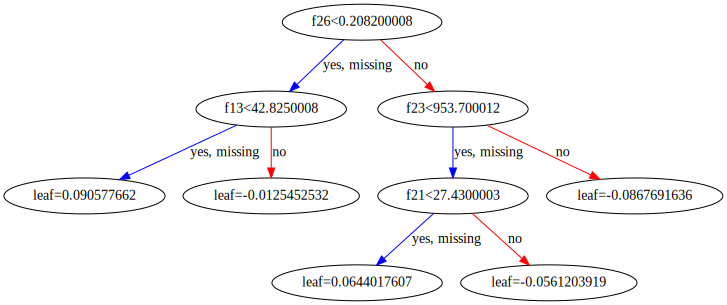

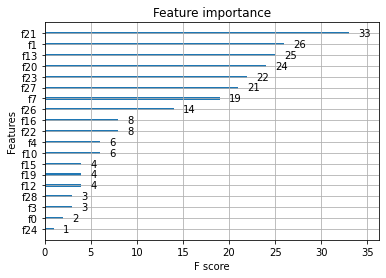

In [25]:
# requires graphviz and python-graphviz conda packages
import graphviz

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

## 6.7 Pipeline

### 6.7.1 Balanced Data

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
class PreprocessTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, cat_features, num_features):
    self.cat_features = cat_features
    self.num_features = num_features
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    df = X.copy()
    # Treat ? workclass as unknown
    df.loc[df['workclass'] == '?', 'workclass'] = 'Unknown'
    # Too many categories, just convert to US and Non-US
    df.loc[df['native_country']!='United-States','native_country']='non_usa'
    # Convert columns to categorical
    for name in self.cat_features:
      col = pd.Categorical(df[name])
      df[name] = col.codes
    # Normalize numerical features
    scaler = MinMaxScaler()
    df[self.num_features] = scaler.fit_transform(df[num_features])
    return df

from sklearn.model_selection import train_test_split
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
  df.drop('high_income', axis=1),
  df['high_income'],
  test_size=0.2,
  random_state=42,
  shuffle=True,
  stratify=df['high_income']
)

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import xgboost as xgb
# Get columns list for categorical and numerical
categorical_features = df.select_dtypes('object').columns.tolist()
numerical_features = df.select_dtypes('int64').columns.tolist()
# Create a pipeline
pipe = Pipeline([
  ('preproc', PreprocTransformer(categorical_features, numerical_features)),
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic'))
])


from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [10],
  }
]
# Define cross validation
kfold = KFold(n_splits=10, random_state=42)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
# Fit grid search
model = grid.fit(X_train, y_train)

predict = model.predict(X_test)
print('Best AUC Score: {}'.format(model.best_score_))
print('Accuracy: {}'.format(accuracy_score(y_test, predict)))
print(confusion_matrix(y_test,predict))
print(model.best_params_)

### 6.7.2 Imbalanced Data - SMOTE

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import os

# Import preprocessing and composing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Import metrics tools
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, classification_report, confusion_matrix

# Import fitting tools
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Calling the encoder classes
ord_enc = OrdinalEncoder(categories = [edu_lvl, income_cat, card_cat])
one_hot_enc = OneHotEncoder(handle_unknown="ignore")

# Make column transformer
column_transform = make_column_transformer((ord_enc, ordinal_enc_variables),
                                          (one_hot_enc, one_hot_enc_variables),
                                           remainder="passthrough")

# Make pipeline
classifier = XGBClassifier()
pipeline = make_pipeline(column_transform, SMOTE(), StandardScaler(), classifier)


# Set parameters values for grid
param_grid = {
    "xgbclassifier__learning_rate":[0.01, 0.3, 0.5],
    "xgbclassifier__n_estimators": [10, 100, 200],
    "xgbclassifier__max_depth": [1, 3, 5],
    "xgbclassifier__objective": ["binary:logistic"],
    "xgbclassifier__use_label_encoder": [False],
    "xgbclassifier__booster": ["gbtree"],
    "xgbclassifier__eval_metric": ["logloss"]}

# Make custom scoring metric
scorer = make_scorer(f1_score, pos_label=1)

# Intantiate GridSearchCV
grid_search_cv = GridSearchCV(pipeline, param_grid, scoring = scorer)

# Fit
model = grid_search_cv.fit(x_train, y_train)

---

# 7. Imbalanced Data

Difference between `weights` and `scale_pos_weight` (from stackflow, see ref 6)

scale_pos_weight is a float (i.e. single value), which allows you to adjust the classification threshold. I.e. to tune the model's tendency to predict positive or negative values across the entire dataset.

DMatrix's weight argument requires an array-like object and is used to specify a "Weight for each instance". This allows more control over how the classifier makes its predictions, as each weight is used to scale the loss function that is being optimised.

**Scenario One**

In this scenario, our dataset consists of images either with a cat or with no animal at all. The dataset is imbalanced, with most images having no animal. Here we might use scale_pos_weight to increase the weighting of positive (with cats) images to deal with the imbalance.

In general, we tend to set scale_pos_weight proportionally to the imbalance. For example, if 20% of the images contain a cat, we would set scale_positive_weight to 4. (Of course this hyperparameter should be set empirically, e.g. using cross-validation, but this is a sensible initial/default value.)

**Scenario Two**

In this scenario, our dataset is again imbalanced with similar proportions of cat vs 'no-cat' images. However, this time it also includes some images with a dog. Potentially, our classifier may tend to mistake dogs for cats, decreasing its performance, with a higher false positive rate. In this instance, we may wish to specify per-sample weights using DMatrix's weight argument. In effect we would attempt to penalise dog-related false positives, which would not be possible with a single factor applied to the overall classification threshold. 

## 8.1 `sample_weights`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
import xgboost as xgb


X = df.drop(['label'], axis=1)
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sample_weights = compute_sample_weight(class_weight='balanced',y=y_train)

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, sample_weight=sample_weights)

params = {
'n_estimators': [50, 100, 150, 200],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'max_depth': range(3, 10),
'colsample_bytree': [i/10.0 for i in range(1, 3)],
'gamma': [i/10.0 for i in range(3)],
}

# Fit grid search
search = GridSearchCV(model, params, cv=3, verbose=1, n_jobs=1)

search.fit(X_train, y_train) # , fit_params={'sample_weight': sample_weights}
print(search.best_params_)

## 8.2 `scale_pos_weight`

A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution. For example, for a dataset with a 1 to 100 ratio for examples in the minority to majority classes, the scale_pos_weight can be set to 100. This will give classification errors made by the model on the minority class (positive class) 100 times more impact, and in turn, 100 times more correction than errors made on the majority class.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
import xgboost as xgb


df = df_encoded_renamed.drop("gender", axis=1)
X = df.drop(['label'], axis=1)
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sample_weights = compute_sample_weight(class_weight='balanced',y=y_train)

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, scale_pos_weight=55)

params = {
'n_estimators': [50, 100, 150, 200],
'earning_rate': [0.01, 0.1, 0.2, 0.3],
'max_depth': range(3, 10),
'colsample_bytree': [i/10.0 for i in range(1, 3)],
'gamma': [i/10.0 for i in range(3)],
}

# Fit grid search
search = GridSearchCV(model, params, cv=3, verbose=1, n_jobs=1)

search.fit(X_train, y_train) # , fit_params={'sample_weight': sample_weights}
print(search.best_params_)

## 8.3 Tune the class weighting hyperparameter of `scale_pos_weight`

In [26]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=7)
# define model
model = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960155 using {'scale_pos_weight': 1000}
0.953721 (0.035950) with: {'scale_pos_weight': 1}
0.958254 (0.028362) with: {'scale_pos_weight': 10}
0.957892 (0.027283) with: {'scale_pos_weight': 25}
0.959157 (0.027430) with: {'scale_pos_weight': 50}
0.959241 (0.028015) with: {'scale_pos_weight': 75}
0.959305 (0.028286) with: {'scale_pos_weight': 99}
0.959505 (0.028213) with: {'scale_pos_weight': 100}
0.960155 (0.028721) with: {'scale_pos_weight': 1000}


# Reference:

1. https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/

2. https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook

3. https://medium.com/@silvaan/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a

4. https://stats.stackexchange.com/questions/243207/what-is-the-proper-usage-of-scale-pos-weight-in-xgboost-for-imbalanced-datasets

5. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

6. https://stackoverflow.com/questions/60764119/xgboost-difference-between-scale-pos-weight-and-class-weights

7. https://stackoverflow.com/questions/67868420/xgboost-for-multiclassification-and-imbalanced-data

8. https://www.kaggle.com/code/kauvinlucas/xgboost-imblearn-pipeline-for-classification

9. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/